In [1]:
%load_ext autoreload
%autoreload 2
from typing import Set
import sys 
sys.path.append('.')
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from correlation_analysis import correlation_analysis_target_acc_vs_ensemble_weight

# Correlation Analyis: 
## Do aggregation weights correlate with target performance of individual models?

**Best result:** strong, significant positive correlation. (=Better models on target have higher aggregation weights.)

**Significance test:** select `alternative=two-sided`


**Procedure:**
1. load results table + ensemble weights
2. average across seeds
3. select all columns from ew_df in results table
4. select target accuracy from results table
5. perform correlation analysis between target, and all rows in ensemble methods
6. save results in new table with multi-index: domains, ensemble_method + columns: pearson correlation coefficient + p-value for `alternative=two-sided`

### Load preprocessed results of all experiments
To perform this analysis, we must at first load all results. 
For an explanation of how to best preprocess, store and load experiment results, have a look at this repo: [https://github.com/maximilianmbeck/viz](https://github.com/maximilianmbeck/viz).

In [2]:
# load all results
results_file = './data/iclr_all_results_dfs.p'
with open(results_file, 'rb') as f:
    # results are stored as a nested dictionary
    results_dict = pickle.load(f)
results_dict.keys()

dict_keys(['MINI_DOMAIN_NET', 'WISDM', 'HAR', 'HHAR_SA', 'AMAZON_REVIEWS', 'EEG', 'MOONS'])

### Run correlation on every experiment and combine results in a data frame

In [3]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings from correlation analysis
alternative_hypothesis = 'two-sided'
index_tuples = []
correlation_analysis_list = []
correlation_analysis_dict = {}
for dataset, da_methods_dict in results_dict.items():
    ca_dataset = {}
    for da_method, result_df_dict in tqdm(da_methods_dict.items(), desc=f'CA for {dataset}'):
        acc_df = result_df_dict['acc_df']
        ew_df = result_df_dict['ew_df']
        index_tuples.append((dataset, da_method))
        ca_df = correlation_analysis_target_acc_vs_ensemble_weight(acc_df, ew_df, alternative_hypothesis)
        ca_dataset[da_method] = ca_df
        correlation_analysis_list.append(ca_df)
    correlation_analysis_dict[dataset] = ca_dataset

# combine all results in one dataframe
ca_index = pd.MultiIndex.from_tuples(index_tuples, names=['dataset', 'da_method'])
res_df = pd.concat(correlation_analysis_list, axis=0, keys=ca_index)

CA for MOONS: 100%|██████████| 11/11 [00:00<00:00, 187.97it/s]


In [4]:
res_df

corr_coeff  \
dataset         da_method domains              ensemble_methods                    
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                     -0.190710   
                                               dev                      0.219167   
                                               iwv                     -0.455193   
                                               source_reg              -0.689448   
                                               target_confidence_reg   -0.172996   
...                                                                          ...   
MOONS           DSAN      0_src-1_tgt          iwv                     -0.219944   
                                               source_reg               0.145984   
                                               target_confidence_reg    0.146596   
                                               target_majority_reg      0.146596   
                                               target_majority_vote          NaN   

                                                                         p_val  \
dataset         da_method domains              ensemble_methods                  
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                    0.650995   
                                               dev                    0.602032   
                                               iwv                    0.257080   
                                               source_reg             0.058520   
                                               target_confidence_reg  0.682047   
...                                                                        ...   
MOONS           DSAN      0_src-1_tgt          iwv                    0.449916   
                                               source_reg             0.618500   
                                               target_confidence_reg  0.617013   
                                               target_majority_reg    0.617013   
                                               target_majority_vote        NaN   

                                                                        ci_low  \
dataset         da_method domains              ensemble_methods                  
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                   -0.789309   
                                               dev                   -0.574184   
                                               iwv                   -0.878179   
                                               source_reg            -0.938274   
                                               target_confidence_reg -0.782302   
...                                                                        ...   
MOONS           DSAN      0_src-1_tgt          iwv                   -0.672092   
                                               source_reg            -0.416886   
                                               target_confidence_reg -0.416369   
                                               target_majority_reg   -0.416369   
                                               target_majority_vote        NaN   

                                                                       ci_high  
dataset         da_method domains              ensemble_methods                 
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                    0.593757  
                                               dev                    0.800249  
                                               iwv                    0.367294  
                                               source_reg             0.029612  
                                               target_confidence_reg  0.605490  
...                                                                        ...  
MOONS           DSAN      0_src-1_tgt          iwv                    0.351675  
                                               source_reg             0.627927  
                                 

In [5]:
res_df.dropna()

corr_coeff  \
dataset         da_method domains              ensemble_methods                    
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                     -0.190710   
                                               dev                      0.219167   
                                               iwv                     -0.455193   
                                               source_reg              -0.689448   
                                               target_confidence_reg   -0.172996   
...                                                                          ...   
MOONS           DSAN      0_src-1_tgt          dev                     -0.219944   
                                               iwv                     -0.219944   
                                               source_reg               0.145984   
                                               target_confidence_reg    0.146596   
                                               target_majority_reg      0.146596   

                                                                         p_val  \
dataset         da_method domains              ensemble_methods                  
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                    0.650995   
                                               dev                    0.602032   
                                               iwv                    0.257080   
                                               source_reg             0.058520   
                                               target_confidence_reg  0.682047   
...                                                                        ...   
MOONS           DSAN      0_src-1_tgt          dev                    0.449916   
                                               iwv                    0.449916   
                                               source_reg             0.618500   
                                               target_confidence_reg  0.617013   
                                               target_majority_reg    0.617013   

                                                                        ci_low  \
dataset         da_method domains              ensemble_methods                  
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                   -0.789309   
                                               dev                   -0.574184   
                                               iwv                   -0.878179   
                                               source_reg            -0.938274   
                                               target_confidence_reg -0.782302   
...                                                                        ...   
MOONS           DSAN      0_src-1_tgt          dev                   -0.672092   
                                               iwv                   -0.672092   
                                               source_reg            -0.416886   
                                               target_confidence_reg -0.416369   
                                               target_majority_reg   -0.416369   

                                                                       ci_high  
dataset         da_method domains              ensemble_methods                 
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                    0.593757  
                                               dev                    0.800249  
                                               iwv                    0.367294  
                                               source_reg             0.029612  
                                               target_confidence_reg  0.605490  
...                                                                        ...  
MOONS           DSAN      0_src-1_tgt          dev                    0.351675  
                                               iwv                    0.351675  
                                 

### Visualize and analyze results

In [6]:
# use this color palette to show stronger positive correlation with darker green colors
cm = sns.light_palette('green', as_cmap=True)
# additionally correlation that is significant (p-value<0.05) is marked red

In [7]:
res_df

corr_coeff  \
dataset         da_method domains              ensemble_methods                    
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                     -0.190710   
                                               dev                      0.219167   
                                               iwv                     -0.455193   
                                               source_reg              -0.689448   
                                               target_confidence_reg   -0.172996   
...                                                                          ...   
MOONS           DSAN      0_src-1_tgt          iwv                     -0.219944   
                                               source_reg               0.145984   
                                               target_confidence_reg    0.146596   
                                               target_majority_reg      0.146596   
                                               target_majority_vote          NaN   

                                                                         p_val  \
dataset         da_method domains              ensemble_methods                  
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                    0.650995   
                                               dev                    0.602032   
                                               iwv                    0.257080   
                                               source_reg             0.058520   
                                               target_confidence_reg  0.682047   
...                                                                        ...   
MOONS           DSAN      0_src-1_tgt          iwv                    0.449916   
                                               source_reg             0.618500   
                                               target_confidence_reg  0.617013   
                                               target_majority_reg    0.617013   
                                               target_majority_vote        NaN   

                                                                        ci_low  \
dataset         da_method domains              ensemble_methods                  
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                   -0.789309   
                                               dev                   -0.574184   
                                               iwv                   -0.878179   
                                               source_reg            -0.938274   
                                               target_confidence_reg -0.782302   
...                                                                        ...   
MOONS           DSAN      0_src-1_tgt          iwv                   -0.672092   
                                               source_reg            -0.416886   
                                               target_confidence_reg -0.416369   
                                               target_majority_reg   -0.416369   
                                               target_majority_vote        NaN   

                                                                       ci_high  
dataset         da_method domains              ensemble_methods                 
MINI_DOMAIN_NET HoMM      real_src-clipart_tgt agg                    0.593757  
                                               dev                    0.800249  
                                               iwv                    0.367294  
                                               source_reg             0.029612  
                                               target_confidence_reg  0.605490  
...                                                                        ...  
MOONS           DSAN      0_src-1_tgt          iwv                    0.351675  
                                               source_reg             0.627927  
                                 

In [8]:
# only our method 
res_df.xs(key='agg', level='ensemble_methods')

corr_coeff         p_val  \
dataset         da_method  domains                                            
MINI_DOMAIN_NET HoMM       real_src-clipart_tgt     -0.190710  6.509950e-01   
                           real_src-infograph_tgt   -0.291823  4.831037e-01   
                           real_src-painting_tgt     0.431114  2.862354e-01   
                           real_src-quickdraw_tgt    0.456218  2.558739e-01   
                           real_src-sketch_tgt      -0.629332  9.454828e-02   
...                                                       ...           ...   
MOONS           CoDATS     0_src-1_tgt               0.989401  2.001302e-11   
                Deep_Coral 0_src-1_tgt               0.948978  2.280713e-07   
                CDAN       0_src-1_tgt               0.996401  3.115111e-14   
                DANN       0_src-1_tgt               0.984598  1.864747e-10   
                DSAN       0_src-1_tgt               0.928206  1.691463e-06   

                                                     ci_low   ci_high  
dataset         da_method  domains                                     
MINI_DOMAIN_NET HoMM       real_src-clipart_tgt   -0.789309  0.593757  
                           real_src-infograph_tgt -0.826529  0.519727  
                           real_src-painting_tgt  -0.392929  0.871139  
                           real_src-quickdraw_tgt -0.366175  0.878475  
                           real_src-sketch_tgt    -0.924163  0.135376  
...                                                     ...       ...  
MOONS           CoDATS     0_src-1_tgt             0.965849  0.996737  
                Deep_Coral 0_src-1_tgt             0.842710  0.984070  
                CDAN       0_src-1_tgt             0.988312  0.998895  
                DANN       0_src-1_tgt             0.950639  0.995251  
                DSAN       0_src-1_tgt             0.783480  0.977419  

[418 rows x 4 columns]

#### Correlation coefficient histograms of all aggregation methods

In [9]:
def make_corr_coeff_histograms_for_ensemble_methods(res_df: pd.DataFrame, exclude_methods: Set[str] = []) -> None:
    ensemble_methods = set(res_df.index.get_level_values('ensemble_methods').unique())
    ensemble_methods = ensemble_methods - exclude_methods
    for em in ensemble_methods:
        corr_coeffs = res_df.xs(key=em, level='ensemble_methods')['corr_coeff'].to_numpy()
        f, ax = plt.subplots()
        plt.hist(corr_coeffs, bins=50)
        ax.set_title(em)

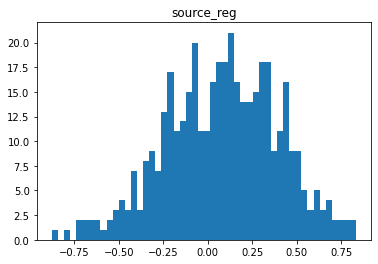

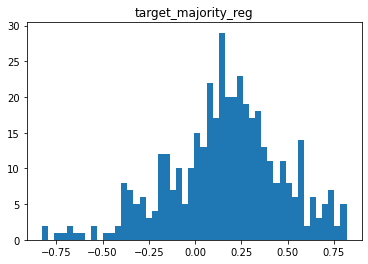

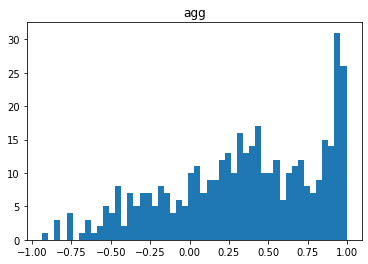

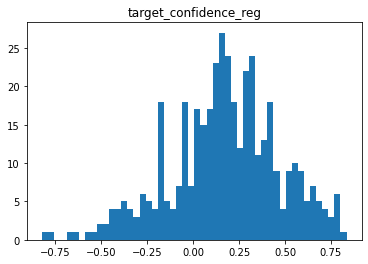

In [10]:
exclude_method = set(['target_majority_vote', 'iwv', 'dev'])
make_corr_coeff_histograms_for_ensemble_methods(res_df, exclude_methods=exclude_method)

#### Boxplot of correlation coefficients of all methods over all datasets

In [11]:
def make_corr_coeff_boxplots_for_ensemble_methods(res_df: pd.DataFrame,
                                                  exclude_methods: Set[str] = [],
                                                  title: str = 'Boxplot of correlation coefficient for every method'):
    res_df = res_df.dropna()
    ensemble_methods = set(res_df.index.get_level_values('ensemble_methods').unique())
    ensemble_methods = ensemble_methods - exclude_methods
    corr_coeffs_per_em = [
        res_df.xs(key=em, level='ensemble_methods')['corr_coeff'].to_numpy() for em in ensemble_methods
    ]
    f, ax = plt.subplots()
    plt.boxplot(x=corr_coeffs_per_em, labels=ensemble_methods)
    ax.set_ylim(-1, 1)
    ax.set_title(title)
    f.autofmt_xdate()
    return f

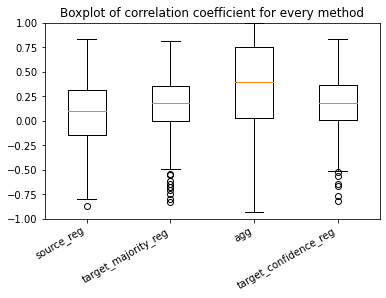

In [12]:
exclude_methods = set(['target_majority_vote', 'iwv', 'dev'])
f = make_corr_coeff_boxplots_for_ensemble_methods(res_df.dropna(), exclude_methods=exclude_methods)

In [13]:
# f.savefig('./boxplot_all_methods.png', dpi=300, bbox_inches='tight')

#### Boxplots correlation coefficient of IWA for each dataset 

In [14]:
def make_corr_coeff_boxplots_for_iwa_per_dataset(res_df: pd.DataFrame, title: str = 'Boxplot of Correlation Coeffiecient for IWA per Dataset'):
    res_df = res_df.dropna()
    agg_df = res_df.xs(key='agg', level='ensemble_methods')
    datasets = list(agg_df.index.get_level_values('dataset').unique())
    corr_coeffs_per_dataset = [agg_df.xs(key=ds, level='dataset')['corr_coeff'].to_numpy() for ds in datasets]
    f, ax = plt.subplots()
    plt.boxplot(x=corr_coeffs_per_dataset, labels=datasets)
    ax.set_ylim(-1,1)
    ax.set_title(title)
    f.autofmt_xdate()
    return f

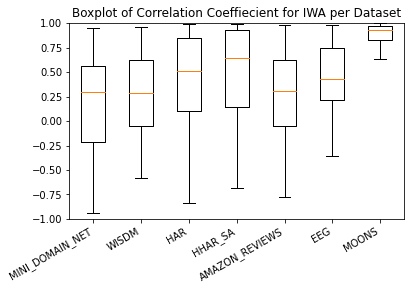

In [15]:
f = make_corr_coeff_boxplots_for_iwa_per_dataset(res_df)

In [16]:
# f.savefig('./boxplot_iwa_datasets.png', dpi=300, bbox_inches='tight')

#### Tables of correlation coefficents

In [17]:
# show mean correlation coefficient per dataset
mean_corr_per_dataset = res_df.xs(key='agg', level='ensemble_methods').groupby(['dataset']).mean().style\
    .background_gradient(cmap=cm, subset=['corr_coeff'], vmin=-1, vmax=1)\
    .highlight_between(subset=['p_val'], left=0, right=0.05, color='red')
mean_corr_per_dataset

,corr_coeff,p_val,ci_low,ci_high
dataset,,,,
AMAZON_REVIEWS,0.280793,0.287478,-0.162580,0.652124
EEG,0.443560,0.227625,-0.009643,0.762036
HAR,0.403786,0.196545,0.026856,0.696972
HHAR_SA,0.499326,0.123547,0.181129,0.747196
MINI_DOMAIN_NET,0.169731,0.316517,-0.420616,0.670881
MOONS,0.880911,0.001947,0.689529,0.960170
WISDM,0.255732,0.288057,-0.195074,0.635011


In [18]:
# save table
# import dataframe_image as dfi
# dfi.export(mean_corr_per_dataset, 'mean_corr_per_dataset.png', dpi=300)

In [19]:
# show mean correlation coefficient per dataset + da_method
mean_corr_per_dataset_dam = res_df.xs(key='agg', level='ensemble_methods').groupby(['dataset', 'da_method']).mean().style\
    .background_gradient(cmap=cm, subset=['corr_coeff'], vmin=-1, vmax=1)\
    .highlight_between(subset=['p_val'], left=0, right=0.05, color='red')
mean_corr_per_dataset_dam

In [20]:
# save table
# import dataframe_image as dfi
# dfi.export(mean_corr_per_dataset_dam, 'mean_corr_per_dataset_dam.png', dpi=300)

In [21]:
# show only our method (IWA), here denoted as 'agg'
all_corr_df = res_df.xs(key='agg', level='ensemble_methods').style\
    .background_gradient(cmap=cm, subset=['corr_coeff'], vmin=-1, vmax=1)\
    .highlight_between(subset=['p_val'], left=0, right=0.05, color='red')
all_corr_df

In [22]:
# save table
# import dataframe_image as dfi
# dfi.export(all_corr_df, 'all_corr_iwa.png', dpi=100, max_rows=-1)

In [23]:
# show all correlation results
# res_df.swaplevel(2,3).style\
#     .background_gradient(cmap=cm, subset=['corr_coeff'], vmin=-1, vmax=1)\
#     .highlight_between(subset=['p_val'], left=0, right=0.05, color='red')